# Lab 7 - Linear regression continued

We will continued learning about linear regression by predicting health insurance prices.

First download the dataset from GitHub: [https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv](https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv)

In this data, each row represents an insurance policy and the 7 columns contain the following information about it:
- age: age of policy holder
- sex: sex of policy holder
- bmi: boday mass index (bmi) of policy holder.  bmi is a (sometimes unreliable) measurement of body fat in adults
- children: number of children (dependents) on the policy
- smoker: whether the policy holder is a smoker
- region: region of the country the policy holder lives in
- charges: price for insurance policy

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns

%matplotlib inline

Load the CSV file into a dataframe and display it:

In [5]:
insurance = pd.read_csv("insurance.txt")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Exploratory Data Analysis

To get a feel for the data, let's do some quick exploratory data analysis.

What's the histogram of the bmi column?

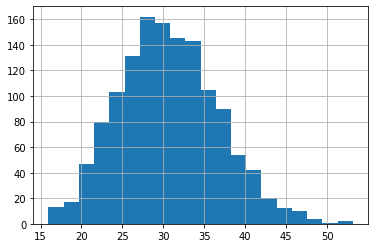

In [8]:
insurance["bmi"].hist(bins = 20)

What distribution does the bmi data have?

__The bmi data resembles the normal distribution.__

Plot scatter plots of all pairs of quantitative variables (hint:  use the Seaborn function `pairplot` from Lab 1 to plot them all at once)

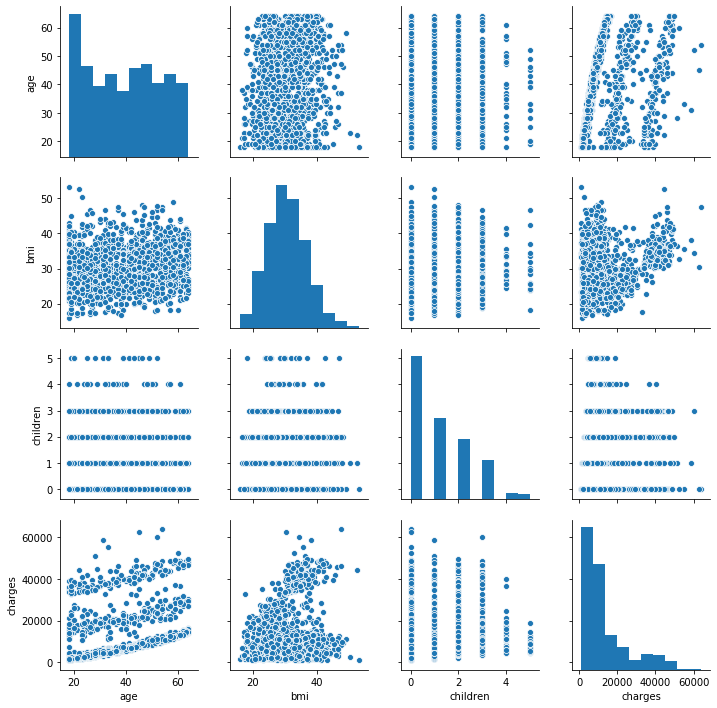

In [9]:
sns.pairplot(data = insurance)

Do any of the variables have a linear relationship with the charges?

__age somewhat has a linear relationship with the charges__

Use Seaborn to make a scatter plot with bmi on the x axis, charges on the y axis, and colored by whether the person is a smoker or not (see Lab 3).

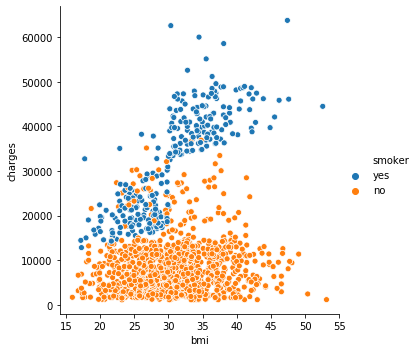

In [11]:
sns.relplot(x = "bmi", y = "charges", hue = "smoker", data = insurance)

Which appears to have the larger effect on the charge:  the policy holder's bmi or whether they are a smoker?

__Whether or not the policy holder is a smoker seems to have a larger effect on the charge. But it seems that if you filter out non-smokers the linear relationship between charges and bmi would be strong.__

Next use Seaborn to make a scatter plot with age on the x axis and charges on the y axis, colored by whether the person is a smoker.

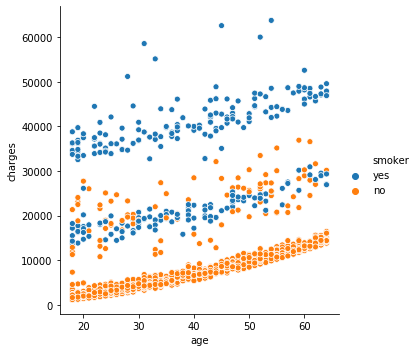

In [12]:
sns.relplot(x = "age", y = "charges", hue = "smoker", data = insurance)

What do you notice about the plot?

__I notice that age has a relatively equal effect on charges despite whether they're a smoker or not. But smokers still have much more charges than non-smokers (intercept is higher for non-smokers but coefficient of age is the same between both).

## Linear regression

Perform linear regression to predict the insurance charge, with age as the independent variable.

In [15]:
lm = smf.ols("charges ~ age", insurance).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     131.2
Date:                Sat, 21 Sep 2019   Prob (F-statistic):           4.89e-29
Time:                        13:33:26   Log-Likelihood:                -14415.
No. Observations:                1338   AIC:                         2.883e+04
Df Residuals:                    1336   BIC:                         2.884e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3165.8850    937.149      3.378      0.001    1327.440    5004.330
age          257.7226     22.502     11.453      0.000     213.579     301.866
==============================================================================
Omnibus:                      399.600   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              864.239
Skew:                           1.733   Prob(JB):                    2.15e-188
Kurtosis:                       4.869   Cond. No.                         124.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What is the equation for the linear model?

__charges = 3165.89 + (257.72 * age)__

How much does this model predict your insurance will increase next year when you are 1 year older?

__by $257.72__

How much would a 25 year old pay?  We can predict this using our model.  First we make a new DataFrame with the age with want to make the prediction for. 

In [16]:
new_data = pd.DataFrame({'age' :[25]})
new_data

,age
0,25


Then we make the prediction:

In [18]:
lm.predict(new_data)

0    9608.950473
dtype: float64

What about if you are 30, 40, or 50 years old?  We can compute the predicted charges of all of these ages at once by making a data frame containing all three ages: 

In [19]:
three_ages = pd.DataFrame({'age': [30,40,50]})
three_ages

,age
0,30
1,40
2,50


Make the prediction using this new dataframe:

In [20]:
lm.predict(three_ages)

0    10897.563566
1    13474.789753
2    16052.015939
dtype: float64

Use the Seaborn package to plot a scatter plot of age vs charges with the regression line on it (see Lab 6):

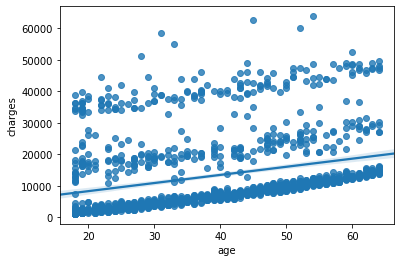

In [24]:
sns.regplot(x = "age", y = "charges", data = insurance, fit_reg = True)

What do you notice about the scatter plot?

__I notice that the line tries to account for both smokers and non-smokers.__

Let's see if this shows up in the plots of the residuals.  Plot the histogram of the residuals.

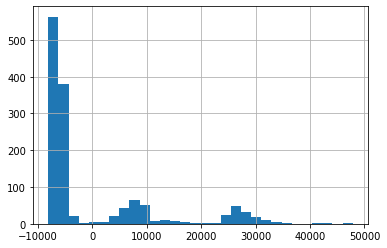

In [26]:
lm.resid.hist(bins = 30)

Does this look like a normal distribution?

__This does look like a normal distribution__

Let's also plot the fitted values (y) against the actual charges (x):

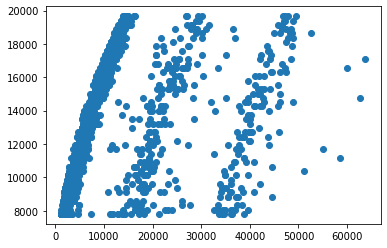

In [27]:
plt.scatter(y = lm.fittedvalues, x = insurance["charges"])

Alternatively, we could plot the ages (x) vs. the residuals (y):

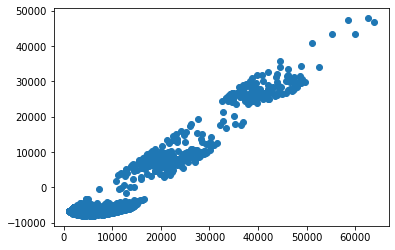

In [29]:
plt.scatter(y = lm.resid, x = insurance["charges"])

Clearly age does not provide the whole picture.  In fact, the R-squared value in the summary (top right corner) is the proportion of variance in the charges that is explained by this model.  Right now this is about 9% which is not good....

However we see that the p-values (the P > |t|) column in the summary is very close to 0.  The p-value is the probability that that coefficient is 0, so there is a linear effect of age on insurance prices.

Let's add the other quantitative columns as independent variables to see if we can get a better fit.

In [30]:
lm2 = smf.ols('charges ~ age + bmi + children', data = insurance).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     60.69
Date:                Sat, 21 Sep 2019   Prob (F-statistic):           8.80e-37
Time:                        13:58:31   Log-Likelihood:                -14392.
No. Observations:                1338   AIC:                         2.879e+04
Df Residuals:                    1334   BIC:                         2.881e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6916.2433   1757.480     -3.935      0.000   -1.04e+04   -3468.518
age          239.9945     22.289     10.767      0.000     196.269     283.720
bmi          332.0834     51.310      6.472      0.000     231.425     432.741
children     542.8647    258.241      2.102      0.036      36.261    1049.468
==============================================================================
Omnibus:                      325.395   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              603.372
Skew:                           1.520   Prob(JB):                    9.54e-132
Kurtosis:                       4.255   Cond. No.                         290.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What is the equation of this linear model?

__charges = -6916.24 + (239.99 * age) + (332.08 * bmi) + (542.86 * children)__

Has the R-squared value improved?

__The R-squared value has improved slightly from 0.089 to 0.12__

Looking at the p-values, could any of the coefficients be 0? 

__The children coefficient has a 3.6% likelihood of being 0.__

Now let's plot the residuals.  First, plot a histogram of the residuals:

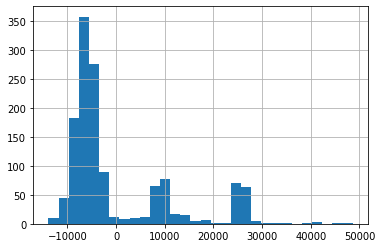

In [31]:
lm2.resid.hist(bins = 30)

What do you notice?  Are the residuals normal?

__The residuals isn't normally distributed__

Next, let's plot the actual charges (x) vs the predicted charges (y):

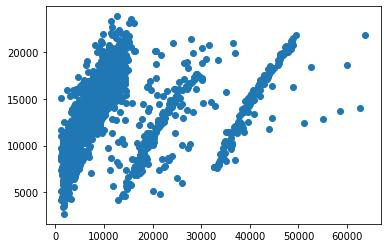

In [35]:
plt.scatter(x = insurance["charges"], y = lm2.fittedvalues)

Did adding bmi and children improve the linear model?

__not really__

Let's add the remaining columns.  Sex, smoker, and region are all categorical variables.  But there is a way to make them into quantitative data using *dummy variables*.

For example, consider the sex column.  There are two categories in it: female and male.  We will encode this using one dummy variable that will be 1 if the sex is male and 2 if the sex is female.

In [36]:
insurance_new = pd.get_dummies(insurance, columns = ["sex"], drop_first = True)
insurance_new.head()

,age,bmi,children,smoker,region,charges,sex_male
0,19,27.900,0,yes,southwest,16884.92400,0
1,18,33.770,1,no,southeast,1725.55230,1
2,28,33.000,3,no,southeast,4449.46200,1
3,33,22.705,0,no,northwest,21984.47061,1
4,32,28.880,0,no,northwest,3866.85520,1


Let's make the other qualitative columns into dummy variables:

In [37]:
insurance_new = pd.get_dummies(insurance_new, columns = ["smoker", "region"], drop_first = True)
insurance_new.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


How was the region column, which had 4 categories, turned into dummy variables?

__It received three dummy variable columns. The fourth possible value is represented by all zeroes__

Now let's make a linear regression model using all these columns:

In [41]:
lm3 = smf.ols("charges ~ age + bmi + children + sex_male + smoker_yes + region_northwest + region_southeast + region_southwest", insurance_new).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Sat, 21 Sep 2019   Prob (F-statistic):               0.00
Time:                        15:44:54   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.194e+04    987.819    -12.086      0.000   -1.39e+04      -1e+04
age                256.8564     11.899     21.587      0.000     233.514     280.199
bmi                339.1935     28.599     11.860      0.000     283.088     395.298
children           475.5005    137.804      3.451      0.001     205.163     745.838
sex_male          -131.3144    332.945     -0.394      0.693    -784.470     521.842
smoker_yes        2.385e+04    413.153     57.723      0.000     2.3e+04    2.47e+04
region_northwest  -352.9639    476.276     -0.741      0.459   -1287.298     581.370
region_southeast -1035.0220    478.692     -2.162      0.031   -1974.097     -95.947
region_southwest  -960.0510    477.933     -2.009      0.045   -1897.636     -22.466
==============================================================================
Omnibus:                      300.366   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.887
Skew:                           1.211   Prob(JB):                    7.86e-157
Kurtosis:                       5.651   Cond. No.                         311.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Has the R-squared value improved?

__The R-squared value improved from .12 to .751. This means that 75.1% of the variation of "charges" is explained in the model.

Looking at the p-values, could any of the coefficients be 0?  Next class will we learn how to decide which independent variables to include in your linear model.

__sex_male and region_northwest could have coefficients of 0 since they have a 69.3% and 45.95 likelihood of having those.__

Now let's plot the residuals.  First, plot a histogram of the residuals:

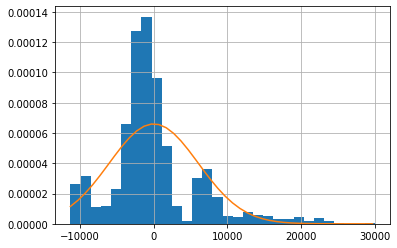

In [46]:
lm3.resid.hist(bins = 30, density = True)

import numpy as np
import scipy.stats as stats
x = np.arange(lm3.resid.min(), lm3.resid.max(), 1000)
y = stats.norm.pdf(x, loc = lm3.resid.mean(), scale = lm3.resid.std())
plt.plot(x,y)

What do you notice?  Are the residuals normal?

__The residuals aren't really normally distributed.__

Next, let's plot the actual charges (x) vs the predicted charges (y):

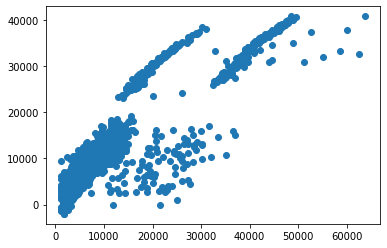

In [47]:
plt.scatter(x = insurance["charges"], y = lm3.fittedvalues)

What do you notice?  Has the model improved?

__The model has slightly improved... but the residuals aren't normally distributed and when the actual charges are plotted against the predicted charges it doesn't resemble the line y = x.__